# Subplots and Enumeration - Lab

## Introduction

In this lab, we'll get some practice creating **_subplots_**, and explore how we can use the `enumerate` keyword to make creating them a bit easier!

## Objectives

You will be able to:

* Use python's `enumerate` keyword for lists where we also to access the index
* Create basic subplots with matplotlib
* Use `enumerate` to write effective, pythonic code when creating subplots

## Getting Started

For this lab, we'll explore the **_Boston Housing Dataset_**, which we've worked with previously. This has plenty of great different types of data that we can use for visualization. Let's start by importing the dataset so we can get to work. 

In the cell below: 

* Import pandas and set the standard alias of `pd`
* Import the `pyplot` module from `matplotlib` and set the standard alias of `plt`
* Set matplotlib visualizations to appear inline with the command `%matplotlib inline`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, let's import the dataset. 

In the cell below:

* Use pandas to read in the data stored in the file `boston_housing.csv`.
    * The fist column in the dataset is an index column, so be sure to pass in the parameter `index_col=0`.
* Print the head of the dataframe to ensure everything loaded correctly. 

In [3]:
df = pd.read_csv('boston_housing.csv', index_col=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


## Creating a Basic Subplot

In the previous lab on matplotlib, we saw a bit about how to create subplots. Let's review this quickly, and get some practice. 

For our first subplot, we'll create 1 row containing 2 subplots. Let's start by getting some data for each of our plots. 

For these plots, slice our data into two groups: houses that border the Charles River (`chas==0`), and houses that don't (`chas==1`). 

Once we have our data broken into these two distinct groups, we'll create some scatterplots of the age versus the median value (`medv`) of the home. 

Run the cell below to get the data for our plots. 

In [12]:
chas_0 = df[df['chas']==0]
x_0 = chas_0['age']
y_0 = chas_0['medv']

chas_1 = df[df['chas']==1]
x_1 = chas_1['age']
y_1 = chas_1['medv']

Now that we have our data ready to go, lets go ahead and create some subplots. For our first batch of subplots, we'll use the quick way by making use of `plt.subplot()` and passing in the number of rows, number of columns, and the number of the subplot that we want to create. Then, we'll create our plot by passing in the corresponding data. 

To make them easier to differentiate between, we'll use some matplotlib shorthand to make the plot on the left use red circles (`'ro'` meaning `'r'` for red, and `'o'` for circles), and green circles for the plot on the right (`'go'`). 

We'll also set give the plots some basic axis labels and a title, because anything worth plotting is worth labeling!

Text(0, 0.5, "Median Value ($1000's)")

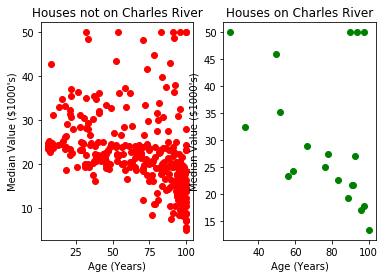

In [26]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(x_0, y_0, 'ro')
plt.title("Houses not on Charles River")
plt.xlabel("Age (Years)")
plt.ylabel("Median Value ($1000's)")
plt.subplot(1,2,2)
plt.plot(x_1, y_1, 'go')
plt.title("Houses on Charles River")
plt.xlabel("Age (Years)")
plt.ylabel("Median Value ($1000's)")

Our plots look pretty good, but they're too squished together, with the y-axis label for plot 2 overlapping with plot 1. We can fix this quite easily by using `plt.subplots_adjust()` and changing the amount of space in between our plots. The [documentation for `subplots_adjust`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots_adjust.html) tells us that the parameter we need to adjust is `wspace`. This is set to `0.2` by default, meaning that the amount of space between our plots is equal to 20% of the width of the plots. Let's set `wspace=0.4`, and see how that looks.

Copy the code from the cell above into the cell below. Then, add the line `plt.subplots_adjust(wspace=0.4)` as the last line and run the cell. 

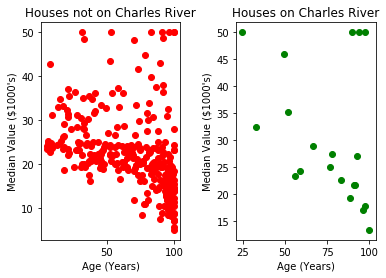

In [27]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(x_0, y_0, 'ro')
plt.title("Houses not on Charles River")
plt.xlabel("Age (Years)")
plt.ylabel("Median Value ($1000's)")
plt.subplot(1,2,2)
plt.plot(x_1, y_1, 'go')
plt.title("Houses on Charles River")
plt.xlabel("Age (Years)")
plt.ylabel("Median Value ($1000's)")
plt.subplots_adjust(wspace=0.4)

Much better!

Now, let's look at some more advanced ways to create subplots by getting a hold of the `ax` objects!

## More Advanced Subplots

